# Descripción de la actividad

## Predictor de precios de determinadas acciones de la bolsa de los Estados Unidos

La predicción del valor de las acciones en la bolsa de valores de EEUU es una tarea importante en la industria financiera que puede ser realizada utilizando técnicas de aprendizaje automático, en particular, redes neuronales recurrentes LSTM. 

El objetivo de esta aplicación es utilizar una red neuronal recurrente LSTM para predecir el valor futuro de las acciones en función de los datos históricos de precios de las mismas.

La creación de la aplicación se compone de los siguientes pasos:
    
    1 - Buscar información acerca del funcionamiento de las LSTM en predicciones de series de tiempo para entender su funcionamiento.
    2 - Bajar los datos (5 empresas de interés).
    3 - Explorar los datos (ver si hay datos faltantes, si en todos los CSV se encuentran los mismos días, si hay datos anómalos, etc).
    4 - Visualizaciones (realizar diferentes gráficos que ayuden a entender los datos y el objetivo del modelo a construir).
    5 - Limpieza de datos (al utilizar LSTM se requiere definir los intérvalos de días que se usarán para entrenar, eliminar columnas innecesarias, etc).
    6 - División de los datos en conjuntos de entrenamiento y prueba.
    7 - Diseñar y dimensionar el modelo.
    8 - Entrenar el modelo.
    9 - Realizar las predicciones.
    10 - Evaluar el modelo (al ser un problema de regresión, se debe evaluar la bondad con medidas de MAE o RMSE).

# Desarrollo de cada paso

### 1 - Buscar información acerca del funcionamiento de las LSTM en predicciones de series de tiempo para entender su funcionamiento.

Con el objetivo de comprender el funcionamiento de las LSTM para predecir valores de series de tiempo, se comienza con la lectura del material de clase "010-Deep_Learning.md.html" y "04EPPY_10_Deep_Learning.ipynb" de la asignatura 04EPPY - Ciencia de datos e Inteligencia Artificial.

Luego, se continúa con la lectura de los siguientes materiales brindados como apoyo por el profesor Oscar Garibo:

A - https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

Este artículo trata sobre cómo utilizar redes neuronales recurrentes LSTM, para predecir valores de series de tiempo en Python utilizando la biblioteca Keras. 
Explica que son las redes neuronales recurrentes y cómo se utilizan para el procesamiento de series de tiempo. Luego, explica cómo preparar los datos de series de tiempo para redes LSTM.

También muestra cómo construir y entrenar una red LSTM utilizando Keras, con ejemplos de código para cada paso.

Por último, el artículo muestra cómo utilizar la red entrenada para hacer predicciones en nuevos datos de series de tiempo y se presentan algunas visualizaciones para ayudar a interpretar los resultados.

B - https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

Este artículo se centra en cómo crear redes LSTM para la predicción de series de tiempo. Comienza con una introducción a las series de tiempo y las redes neuronales recurrentes (RNN).

Luego, se introduce el modelo LSTM y se explica cómo funciona en comparación con otros tipos de RNN. Se detalla cómo se pueden configurar las capas y los hiperparámetros de un modelo LSTM para ajustarse a los datos de series de tiempo específicos, incluyendo la longitud de la ventana de tiempo, el número de unidades LSTM, la tasa de aprendizaje y el número de épocas (epochs) de entrenamiento.

### 2 - Bajar los datos (5 empresas de interés).

A - Se accede a la página web de Yahoo Finance (https://finance.yahoo.com/).

B - Se busca el nombre de la empresa o símbolo de cotización de la acción de la cual se quieran obtener los datos históricos.

C - Se da click en el botón "Historical Data" en la página de la acción.

D - Se selecciona el rango de fechas para los datos históricos que se quieran obtener.

E - Se elige el intervalo de tiempo para los datos históricos (diario, semanal o mensual).

F - Se descargan los datos en formato CSV.

### 3 - Explorar los datos (ver si hay datos faltantes, si en todos los CSV se encuentran los mismos días, si hay datos anómalos, etc).

In [115]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

#### Defino un valor semilla para que mis resultados puedan ser reproducidos en otra computadora

In [116]:
tf.random.set_seed(25) 

#### Cargo los datos en dataframes

In [117]:
path_amzn = os.path.join("res", "AMZN.csv")
df_amzn = pd.read_csv(path_amzn)
#display(df_amzn)

path_de = os.path.join("res", "DE.csv")
df_de = pd.read_csv(path_de)
#display(df_de.head())

path_goog = os.path.join("res", "GOOG.csv")
df_goog = pd.read_csv(path_goog)
#display(df_goog.head())

path_msft = os.path.join("res", "MSFT.csv")
df_msft = pd.read_csv(path_msft)
#display(df_msft.head())

path_tsla = os.path.join("res", "TSLA.csv")
df_tsla = pd.read_csv(path_tsla)
#display(df_tsla.head())

#### Verifico que todos los dataframes tengan la misma cantidad de filas y columnas

In [118]:
print("AMZN:", df_amzn.shape)
print("DE:", df_de.shape)
print("GOOG:", df_goog.shape)
print("MSFT:", df_msft.shape)
print("TSLA:", df_tsla.shape)

AMZN: (251, 7)
DE: (251, 7)
GOOG: (251, 7)
MSFT: (251, 7)
TSLA: (251, 7)


#### Verifico si algunos de los dataframes tiene datos faltantes

In [119]:
print("AMZN:", df_amzn.isnull().sum())
print("DE:", df_de.isnull().sum())
print("GOOG:", df_goog.isnull().sum())
print("MSFT:", df_msft.isnull().sum())
print("TSLA:", df_tsla.isnull().sum())

AMZN: Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
DE: Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
GOOG: Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
MSFT: Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
TSLA: Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### Verifico si los dataframes tienen los mismos días

In [120]:
print(f"Los dataframes contienen las mismas fechas: {set(df_amzn['Date']) == set(df_de['Date']) == set(df_goog['Date']) == set(df_msft['Date']) == set(df_tsla['Date'])}")

Los dataframes contienen las mismas fechas: True


#### Verifico si existen datos anómalos en algún dataframe

In [121]:
print("AMZN:", df_amzn.describe())
print("DE:", df_de.describe())
print("GOOG:", df_goog.describe())
print("MSFT:", df_msft.describe())
print("TSLA:", df_tsla.describe())

AMZN:              Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   110.868962  112.794869  108.824420  110.819783  110.819783   
std     18.125858   18.339149   17.826875   18.010022   18.010022   
min     82.800003   83.480003   81.430000   81.820000   81.820000   
25%     96.035000   97.544998   94.195000   96.259998   96.259998   
50%    108.103500  111.629997  106.193001  108.680000  108.680000   
75%    122.328499  123.815002  119.910000  122.235001  122.235001   
max    158.399994  160.078995  154.511505  158.115494  158.115494   

             Volume  
count  2.510000e+02  
mean   7.342359e+07  
std    3.068208e+07  
min    3.508860e+07  
25%    5.373780e+07  
50%    6.556730e+07  
75%    8.392465e+07  
max    2.726620e+08  
DE:              Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   382.263626  387.090239  3

### 4 - Visualizaciones (realizar diferentes gráficos que ayuden a entender los datos y el objetivo del modelo a construir).

Primero se hace un concatenado vertical de los datos para agruparlos todos en el mismo dataframe y poder trabajar con las gráficas. 

Además se agrega el símbolo de cada acción para saber que datos corresponden a cada empresa y se convierte la columna DATE a formato fecha.

In [122]:
df_amzn["Symbol"] = "AMZN"
df_de["Symbol"] = "DE"
df_goog["Symbol"] = "GOOG"
df_msft["Symbol"] = "MSFT"
df_tsla["Symbol"] = "TSLA"

df_stocks = pd.concat([df_amzn, df_de, df_goog, df_msft, df_tsla], axis = 0)
df_stocks["Date"] = pd.to_datetime(df_stocks["Date"])
display(df_stocks)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2022-04-07,158.399994,160.078995,154.511505,157.784500,157.784500,68136000,AMZN
1,2022-04-08,156.750000,157.368500,154.231003,154.460495,154.460495,46002000,AMZN
2,2022-04-11,152.712997,154.136505,150.534500,151.121994,151.121994,52112000,AMZN
3,2022-04-12,153.692505,155.098999,150.382996,150.787506,150.787506,55178000,AMZN
4,2022-04-13,150.018494,156.024994,149.600006,155.541000,155.541000,53390000,AMZN
...,...,...,...,...,...,...,...,...
246,2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,169638500,TSLA
247,2023-04-03,199.910004,202.690002,192.199997,194.770004,194.770004,169545900,TSLA
248,2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800,TSLA
249,2023-04-05,190.520004,190.679993,183.759995,185.520004,185.520004,133882500,TSLA


#### Gráfico de líneas: sirve para ver la tendencia de los precios a lo largo del tiempo.

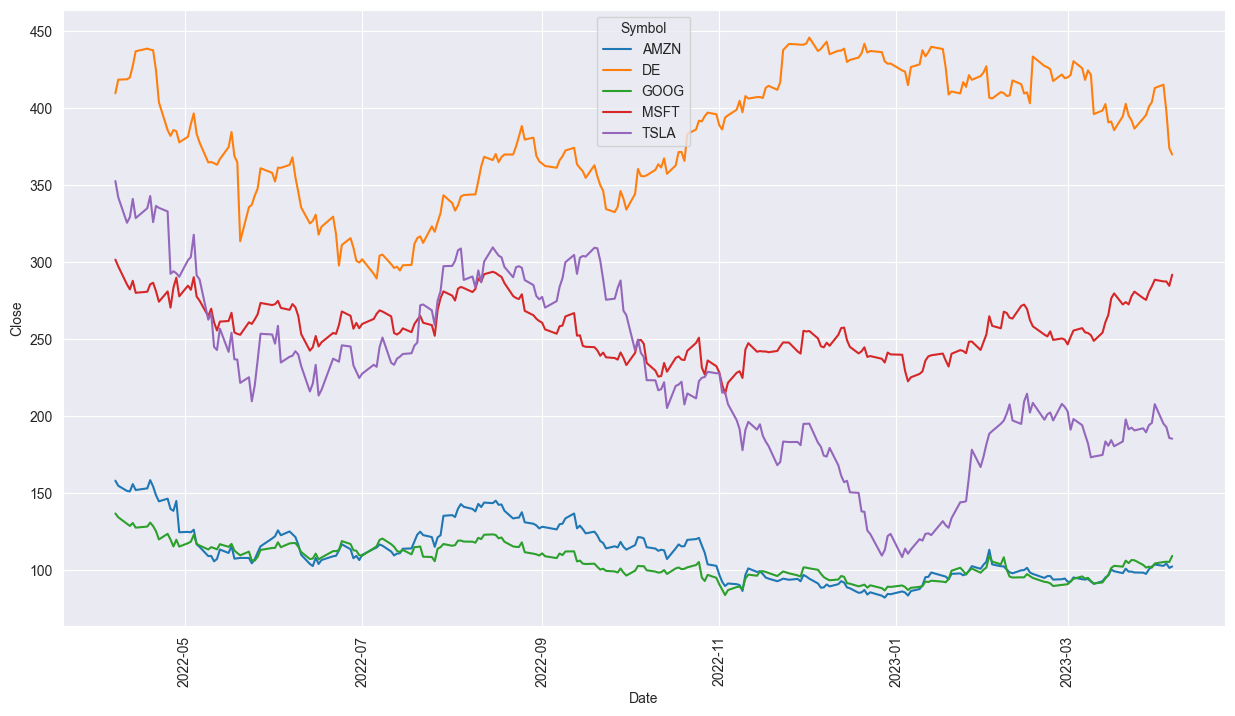

In [123]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
sns.lineplot(x = "Date", y = "Close", hue = "Symbol", data = df_stocks)
plt.show()

#### Gráfico de dispersión: sirve para ver la relación entre el precio de las acciones y el volumen de compra / venta.

In [124]:
df_stocks["Volume"] = df_stocks["Volume"].astype(float)

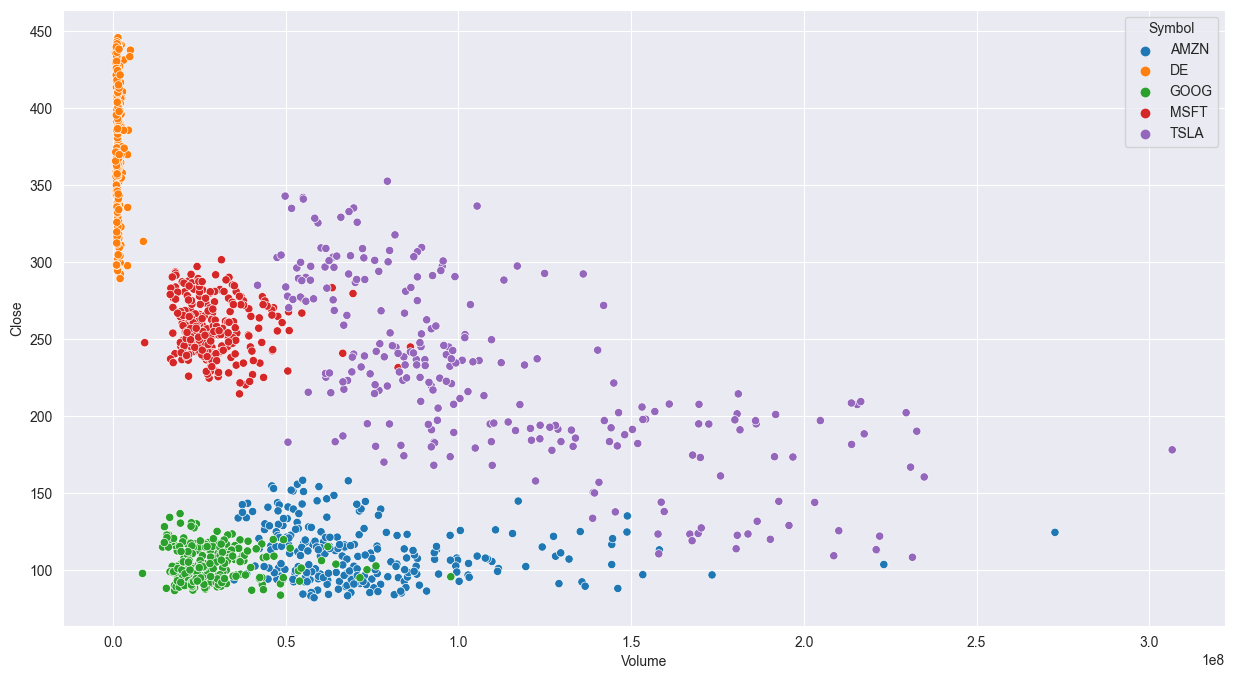

In [125]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "Volume", y = "Close", hue = "Symbol", data = df_stocks)
plt.show()

#### Histograma: sirve para ver la distribución de los precios de las acciones.

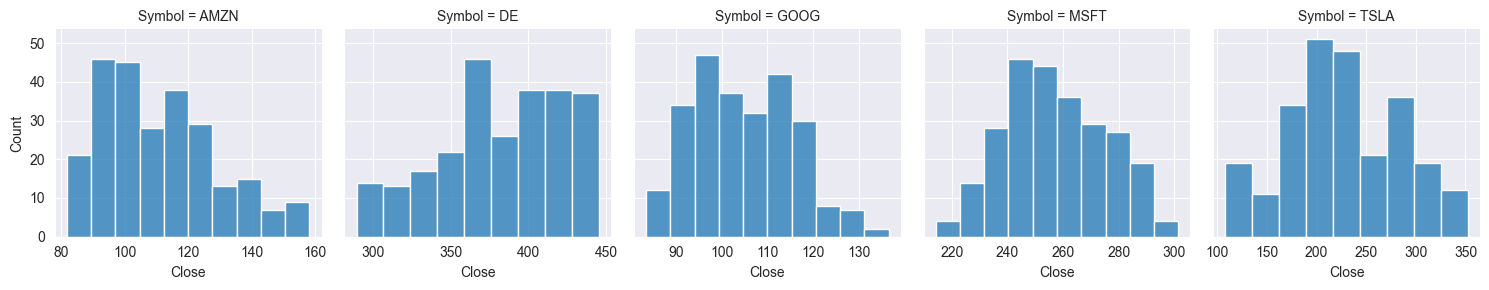

In [126]:
sns.set_style("darkgrid")
g = sns.FacetGrid(df_stocks, col = "Symbol", sharex = False)
g.map(sns.histplot, "Close")
plt.show()

### 5 - Limpieza de datos (al utilizar LSTM se requiere definir los intérvalos de días que se usarán para entrenar, eliminar columnas innecesarias, etc).
### 6 - División de los datos en conjuntos de entrenamiento y prueba.

(Los pasos 5 y 6 se realizan de manera conjunta)

#### Creo un menú de selección de la acción que se quiera predecir

In [146]:
acciones = {
    "1": "Amazon",
    "2": "Deere & Company",
    "3": "Alphabet (Google)",
    "4": "Microsoft",
    "5": "Tesla"
}

print("Acciones disponibles para predecir precios:\n")
for key, value in acciones.items():
    print(key, "-", value)

while True:
    simbolo = input("\nInserte el número de la acción de la cual quiera predecir el precio: ")
    if simbolo.isdigit() and int(simbolo) in range(1, 6):
        print(f"\nUsted ha seleccionado la empresa {acciones[simbolo]}.")
        simbolo_ = int(simbolo)
        break
    else:
        print("\nError: por favor ingrese un número válido.")
        
# Selecciono el dataframe según la opción ingresada por el usuario
if simbolo_ == 1:
    df_stock = df_stocks[df_stocks["Symbol"] == "AMZN"]
    df_stock_copy = df_stock.copy()
    df_stock_copy.set_index("Date", inplace = True)
elif simbolo_ == 2:
    df_stock = df_stocks[df_stocks["Symbol"] == "DE"]
    df_stock_copy = df_stock.copy()
    df_stock_copy.set_index("Date", inplace = True)
elif simbolo_ == 3:
    df_stock = df_stocks[df_stocks["Symbol"] == "GOOG"]
    df_stock_copy = df_stock.copy()
    df_stock_copy.set_index("Date", inplace = True)
elif simbolo_ == 4:
    df_stock = df_stocks[df_stocks["Symbol"] == "MSFT"]
    df_stock_copy = df_stock.copy()
    df_stock_copy.set_index("Date", inplace = True)
elif simbolo_ == 5:
    df_stock = df_stocks[df_stocks["Symbol"] == "TSLA"]
    df_stock_copy = df_stock.copy()
    df_stock_copy.set_index("Date", inplace = True)

display(df_stock_copy)

Acciones disponibles para predecir precios:

1 - Amazon
2 - Deere & Company
3 - Alphabet (Google)
4 - Microsoft
5 - Tesla



Inserte el número de la acción de la cual quiera predecir el precio:  5



Usted ha seleccionado la empresa Tesla.


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2022-04-07,350.796661,358.863342,340.513336,352.420013,352.420013,79447200.0,TSLA
2022-04-08,347.736664,349.480011,340.813324,341.829987,341.829987,55013700.0,TSLA
2022-04-11,326.799988,336.156677,324.880005,325.309998,325.309998,59357100.0,TSLA
2022-04-12,332.546661,340.396667,325.533325,328.983337,328.983337,65976000.0,TSLA
2022-04-13,327.026672,342.079987,324.366669,340.790009,340.790009,55121100.0,TSLA
...,...,...,...,...,...,...,...
2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,169638500.0,TSLA
2023-04-03,199.910004,202.690002,192.199997,194.770004,194.770004,169545900.0,TSLA
2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800.0,TSLA


#### Elimino las columnas innecesarias

In [147]:
df_stock_copy = df_stock_copy.drop(["Open", "High", "Low", "Adj Close", "Volume", "Symbol"], axis = 1)
display(df_stock_copy)

,Close
Date,
2022-04-07,352.420013
2022-04-08,341.829987
2022-04-11,325.309998
2022-04-12,328.983337
2022-04-13,340.790009
...,...
2023-03-31,207.460007
2023-04-03,194.770004
2023-04-04,192.580002


#### Defino el intervalo de días que usaré para entrenar mi modelo

In [148]:
# Selecciono intervalo de los 10 primeros meses para entrenar
train_data = df_stock_copy.loc["2022-04-07":"2023-02-03"]

# Selecciono los últimos 2 meses para predecir
test_data = df_stock_copy.loc["2023-02-06":"2023-04-06"]

#### Normalizo los valores en una escala entre 0 y 1 ya que los valores originales varían dentro de una escala demasiado grande

In [149]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [150]:
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

#### Defino una función para crear los datasets de entrenamiento y de test utilizando como apoyo los materiales comentados en el paso 1.

In [151]:
def create_dataset(data, n_steps):
    """
    La función create_dataset se encarga de crear un conjunto de datos de entrenamiento a partir de una secuencia de datos y un número de pasos (n_steps) especificado.

    Parámetros:

    data (ndarray): La secuencia de datos de entrada en formato NumPy.
    n_steps (int): El número de pasos en la secuencia que se utilizará para predecir el siguiente valor.
    Returns:

    x_train (ndarray): El conjunto de datos de entrada en formato NumPy con forma (n_samples, n_steps).
    y_train (ndarray): El conjunto de datos de salida en formato NumPy con forma (n_samples,).
    
    Por ejemplo, si n_steps = 12, en la primera iteración del bucle for guardará en x_train el la serie de datos que estén entre la posición data[12 - 12 : 12], es decir data[0 : 12].
    Es decir, los primeros 12 datos se guardan en x_train posición 0 y en y_train se guarda el valor que tiene posición número 13 en data. Así se crea la ventana de trabajo, con los
    primeros 12 valores se calcula el valor 13. 
    """
    x_train = list()
    y_train = list()

    for i in range(n_steps, len(data)):
        x_train.append(data[i - n_steps : i, 0])
        y_train.append(data[i, 0])
        
    return asarray(x_train), asarray(y_train)

In [152]:
n_steps = 12
X_train, y_train = create_dataset(train_data_scaled, n_steps)
X_test, y_test = create_dataset(test_data_scaled, n_steps)

#### Se debe realizar un reshape de los datos que están en una matríz de 2D hacia una matríz 3D para que funcione la librería de keras.

In [153]:
# Matríz 2D
print(X_train.shape)

(196, 12)


In [154]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [155]:
# Matríz 3D
print(X_train.shape)

(196, 12, 1)


### 7 - Diseñar y dimensionar el modelo.

In [156]:
model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))

### 8 - Entrenar el modelo.

In [157]:
model.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

In [158]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 15)

In [159]:
model.fit(X_train, y_train, epochs = 350, batch_size = 32, verbose = 1, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/350
7/7 [==============================] - 3s 105ms/step - loss: 0.1546 - mae: 0.3287 - val_loss: 0.0097 - val_mae: 0.0886
Epoch 2/350
7/7 [==============================] - 0s 11ms/step - loss: 0.0278 - mae: 0.1418 - val_loss: 0.0024 - val_mae: 0.0372
Epoch 3/350
7/7 [==============================] - 0s 11ms/step - loss: 0.0152 - mae: 0.0985 - val_loss: 0.0022 - val_mae: 0.0391
Epoch 4/350
7/7 [==============================] - 0s 11ms/step - loss: 0.0116 - mae: 0.0854 - val_loss: 0.0056 - val_mae: 0.0646
Epoch 5/350
7/7 [==============================] - 0s 14ms/step - loss: 0.0090 - mae: 0.0760 - val_loss: 0.0022 - val_mae: 0.0361
Epoch 6/350
7/7 [==============================] - 0s 11ms/step - loss: 0.0079 - mae: 0.0738 - val_loss: 0.0016 - val_mae: 0.0316
Epoch 7/350
7/7 [==============================] - 0s 11ms/step - loss: 0.0070 - mae: 0.0690 - val_loss: 0.0023 - val_mae: 0.0372
Epoch 8/350
7/7 [==============================] - 0s 11ms/step - loss: 0.0077 - mae: 0.0

### 9 - Realizar las predicciones.

In [160]:
prediccion = model.predict(X_test)
prediccion = scaler.inverse_transform(prediccion)

1/1 [==============================] - 1s 516ms/step


### 10 - Evaluar el modelo (al ser un problema de regresión, se debe evaluar la bondad con medidas de MAE o RMSE).

In [161]:
mae = mean_absolute_error(y_test, prediccion)
rmse = mean_squared_error(y_test, prediccion, squared = False)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 196.40842827161094
RMSE: 196.62944136107114


In [162]:
y_test_back_to_normal = scaler.inverse_transform(y_test.reshape(-1, 1))

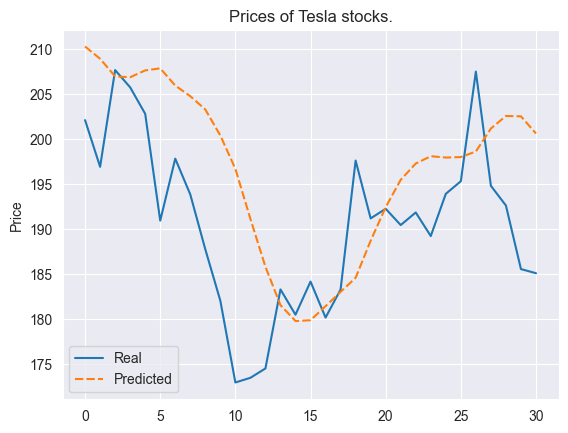

In [163]:
df = pd.DataFrame({"Real": y_test_back_to_normal.flatten(), "Predicted": prediccion.flatten()})
sns.lineplot(data = df)
plt.ylabel("Price")
plt.title(f"Prices of {acciones[simbolo]} stocks.")
plt.show()

In [164]:
print("Valores de la predicción: \n")
print(prediccion)
print("\nValores reales:\n")
print(y_test_back_to_normal)

Valores de la predicción: 

[[210.25156]
 [208.88542]
 [206.92673]
 [206.83403]
 [207.59311]
 [207.82236]
 [205.90915]
 [204.72542]
 [203.2508 ]
 [200.35518]
 [196.65587]
 [191.10052]
 [185.77553]
 [181.51257]
 [179.74686]
 [179.8367 ]
 [181.39871]
 [182.98227]
 [184.5528 ]
 [188.67049]
 [192.39546]
 [195.43883]
 [197.24275]
 [198.05884]
 [197.91084]
 [197.96597]
 [198.5824 ]
 [201.13602]
 [202.52914]
 [202.49017]
 [200.58296]]

Valores reales:

[[202.070007]
 [196.880005]
 [207.630005]
 [205.710007]
 [202.770004]
 [190.899994]
 [197.789993]
 [193.809998]
 [187.710007]
 [182.      ]
 [172.919998]
 [173.440002]
 [174.479996]
 [183.259995]
 [180.449997]
 [184.130005]
 [180.130005]
 [183.25    ]
 [197.580002]
 [191.149994]
 [192.220001]
 [190.410004]
 [191.809998]
 [189.190002]
 [193.880005]
 [195.279999]
 [207.460007]
 [194.770004]
 [192.580002]
 [185.520004]
 [185.059998]]
